# Cost analysis based on DE-SynPUF data

The analysis utilizes the CMS 2008-2010 Data Entrepreneurs’ Synthetic Public Use File (DE-SynPUF). This dataset was crafted by the Centers for Medicare and Medicaid Services (CMS) to provide a means for individuals to familiarize themselves with Medicare claims data, all while ensuring the privacy of beneficiaries.

Understanding Key Terms:

**Centers for Medicare and Medicaid Services (CMS)**: A federal agency in the US, CMS oversees the country's primary healthcare programs, including Medicare, Medicaid, and CHIP.

**Medicare Claims Data**: This refers to administrative data, also termed as Medicare Fee-for-Service claims data or health services utilization data. Managed by CMS, this data originates from payment information or bill settlements. It is clinically validated and encompasses crucial details related to care, such as admission and discharge timings, diagnostic and procedural codes, care source, date of death, and demographic specifics like age, race, ethnicity, and residence location.

**CMS 2008-2010 Data Entrepreneurs’ Synthetic Public Use Files (DE-SynPUF)**: The DE-SynPUF is a simulated version of the Medicare Claims dataset. CMS introduced the DE-SynPUF to offer a realistic claims data set to the public. While the synthetic nature of the DE-SynPUF limits its value for drawing definitive conclusions about Medicare beneficiaries, it provides a more accessible, timely, and cost-effective way to access realistic Medicare claims data. This initiative aims to foster innovation that can enhance care for beneficiaries and boost the overall health of the population.

Reference:
Codebook: https://www.cms.gov/files/document/de-10-codebook.pdf-0

In [35]:
#!pip3 install seaborn
# !pip3 install plotly

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
import plotly.express as px
import seaborn as sns
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data/.DS_Store
data/DE1_0_2008_to_2010_Outpatient_Claims_Sample_1.csv
data/DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv
data/DE1_0_2010_Beneficiary_Summary_File_Sample_1.csv
data/DE1_0_2009_Beneficiary_Summary_File_Sample_1.csv
data/DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv


# Explore

Take a quick look at the data sets. Determine the foreign key that connects the tables.

In [15]:
df_bene_08 = pd.read_csv("data/DE1_0_2008_Beneficiary_Summary_File_Sample_1.csv",low_memory=True)
print(df_bene_08.shape)
df_bene_08.columns

(116352, 32)


Index(['DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT', 'BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'BENE_ESRD_IND', 'SP_STATE_CODE', 'BENE_COUNTY_CD',
       'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
       'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA',
       'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP', 'MEDREIMB_OP', 'BENRES_OP',
       'PPPYMT_OP', 'MEDREIMB_CAR', 'BENRES_CAR', 'PPPYMT_CAR'],
      dtype='object')

In [16]:
df_inpatient = pd.read_csv("data/DE1_0_2008_to_2010_Inpatient_Claims_Sample_1.csv",low_memory=True)
print(df_inpatient.shape)
df_inpatient.columns

(66773, 81)


Index(['DESYNPUF_ID', 'CLM_ID', 'SEGMENT', 'CLM_FROM_DT', 'CLM_THRU_DT',
       'PRVDR_NUM', 'CLM_PMT_AMT', 'NCH_PRMRY_PYR_CLM_PD_AMT', 'AT_PHYSN_NPI',
       'OP_PHYSN_NPI', 'OT_PHYSN_NPI', 'CLM_ADMSN_DT', 'ADMTNG_ICD9_DGNS_CD',
       'CLM_PASS_THRU_PER_DIEM_AMT', 'NCH_BENE_IP_DDCTBL_AMT',
       'NCH_BENE_PTA_COINSRNC_LBLTY_AM', 'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM',
       'CLM_UTLZTN_DAY_CNT', 'NCH_BENE_DSCHRG_DT', 'CLM_DRG_CD',
       'ICD9_DGNS_CD_1', 'ICD9_DGNS_CD_2', 'ICD9_DGNS_CD_3', 'ICD9_DGNS_CD_4',
       'ICD9_DGNS_CD_5', 'ICD9_DGNS_CD_6', 'ICD9_DGNS_CD_7', 'ICD9_DGNS_CD_8',
       'ICD9_DGNS_CD_9', 'ICD9_DGNS_CD_10', 'ICD9_PRCDR_CD_1',
       'ICD9_PRCDR_CD_2', 'ICD9_PRCDR_CD_3', 'ICD9_PRCDR_CD_4',
       'ICD9_PRCDR_CD_5', 'ICD9_PRCDR_CD_6', 'HCPCS_CD_1', 'HCPCS_CD_2',
       'HCPCS_CD_3', 'HCPCS_CD_4', 'HCPCS_CD_5', 'HCPCS_CD_6', 'HCPCS_CD_7',
       'HCPCS_CD_8', 'HCPCS_CD_9', 'HCPCS_CD_10', 'HCPCS_CD_11', 'HCPCS_CD_12',
       'HCPCS_CD_13', 'HCPCS_CD_14', 'HCPCS_CD_15', 

In [18]:
df_outpatient = pd.read_csv("data/DE1_0_2008_to_2010_Outpatient_Claims_Sample_1.csv",low_memory=False)
print(df_outpatient.shape)
df_outpatient.columns

(790790, 76)


Index(['DESYNPUF_ID', 'CLM_ID', 'SEGMENT', 'CLM_FROM_DT', 'CLM_THRU_DT',
       'PRVDR_NUM', 'CLM_PMT_AMT', 'NCH_PRMRY_PYR_CLM_PD_AMT', 'AT_PHYSN_NPI',
       'OP_PHYSN_NPI', 'OT_PHYSN_NPI', 'NCH_BENE_BLOOD_DDCTBL_LBLTY_AM',
       'ICD9_DGNS_CD_1', 'ICD9_DGNS_CD_2', 'ICD9_DGNS_CD_3', 'ICD9_DGNS_CD_4',
       'ICD9_DGNS_CD_5', 'ICD9_DGNS_CD_6', 'ICD9_DGNS_CD_7', 'ICD9_DGNS_CD_8',
       'ICD9_DGNS_CD_9', 'ICD9_DGNS_CD_10', 'ICD9_PRCDR_CD_1',
       'ICD9_PRCDR_CD_2', 'ICD9_PRCDR_CD_3', 'ICD9_PRCDR_CD_4',
       'ICD9_PRCDR_CD_5', 'ICD9_PRCDR_CD_6', 'NCH_BENE_PTB_DDCTBL_AMT',
       'NCH_BENE_PTB_COINSRNC_AMT', 'ADMTNG_ICD9_DGNS_CD', 'HCPCS_CD_1',
       'HCPCS_CD_2', 'HCPCS_CD_3', 'HCPCS_CD_4', 'HCPCS_CD_5', 'HCPCS_CD_6',
       'HCPCS_CD_7', 'HCPCS_CD_8', 'HCPCS_CD_9', 'HCPCS_CD_10', 'HCPCS_CD_11',
       'HCPCS_CD_12', 'HCPCS_CD_13', 'HCPCS_CD_14', 'HCPCS_CD_15',
       'HCPCS_CD_16', 'HCPCS_CD_17', 'HCPCS_CD_18', 'HCPCS_CD_19',
       'HCPCS_CD_20', 'HCPCS_CD_21', 'HCPCS_CD_22', 'HC

## Preprocessing



In [21]:
df_bene_09 = pd.read_csv("data/DE1_0_2009_Beneficiary_Summary_File_Sample_1.csv",low_memory=True)
df_bene_10 = pd.read_csv("data/DE1_0_2010_Beneficiary_Summary_File_Sample_1.csv",low_memory=True)
df_bene = pd.concat([df_bene_08, df_bene_09, df_bene_10])

In [22]:
df_bene.shape

(343644, 32)

In [23]:
df_bene.DESYNPUF_ID.nunique()

116352

In [26]:
df_bene = df_bene.astype(
    {'SP_DEPRESSN': 'category',
     'SP_DIABETES':'category',
     'SP_ISCHMCHT':'category'}
)

In [28]:
df_alive = df_bene[df_bene['BENE_DEATH_DT'].isnull()]
df_dead = df_bene[df_bene['BENE_DEATH_DT'].notnull()]

In [29]:
df_alive.shape

(338183, 32)

In [30]:
df_dead.shape

(5461, 32)

## Explore inpatient table

In [77]:
# Set the overall aesthetic
sns.set()
sns.set_context("talk", font_scale=0.8)  # Adjust font_scale as needed
sns.set_palette("pastel")

In [95]:
# helper function
def dist_chart_two_panels(x, title1, title2='Empirical CDF', binwidth=1):
    """
    This function will produce a histogram on the left panel and an empirical CDF on the right panel.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot data on the first axis
    sns.histplot(x, binwidth=binwidth, edgecolor='none', color="skyblue", ax=axes[0])
    axes[0].set_title(title1)
    
    # Plot data on the second axis
    sns.ecdfplot(x, stat='proportion', color="skyblue", ax=axes[1])
    axes[1].set_title(title2)

    # Adjust the layout
    plt.tight_layout()
    plt.show()

**Question 1: What's the distribution of the admission duration**

In [ ]:
df_inpatient['admit_date'] = pd.to_datetime(df_inpatient['CLM_ADMSN_DT'],format='%Y%m%d')
df_inpatient['discha_date'] = pd.to_datetime(df_inpatient['NCH_BENE_DSCHRG_DT'],format='%Y%m%d')
df_inpatient['adm_duration'] = (df_inpatient['discha_date'] - df_inpatient['admit_date']).dt.days

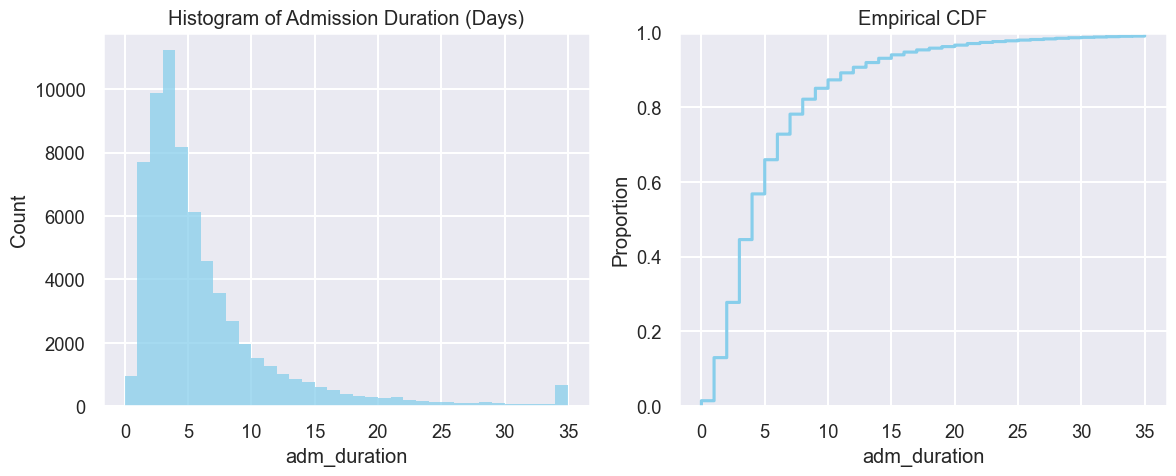

In [96]:
dist_chart_two_panels(df_inpatient['adm_duration'], title1='Histogram of Admission Duration (Days)')

The distribution of admission duration exhibits a right-skewed pattern. The modal value for the duration stands at 4 days. Notably, approximately 90% of the admissions span less than two weeks.

**Question 2: What's the distribution of inpatient visit counts?**

In [97]:
num_visits = df_inpatient['DESYNPUF_ID'].value_counts()

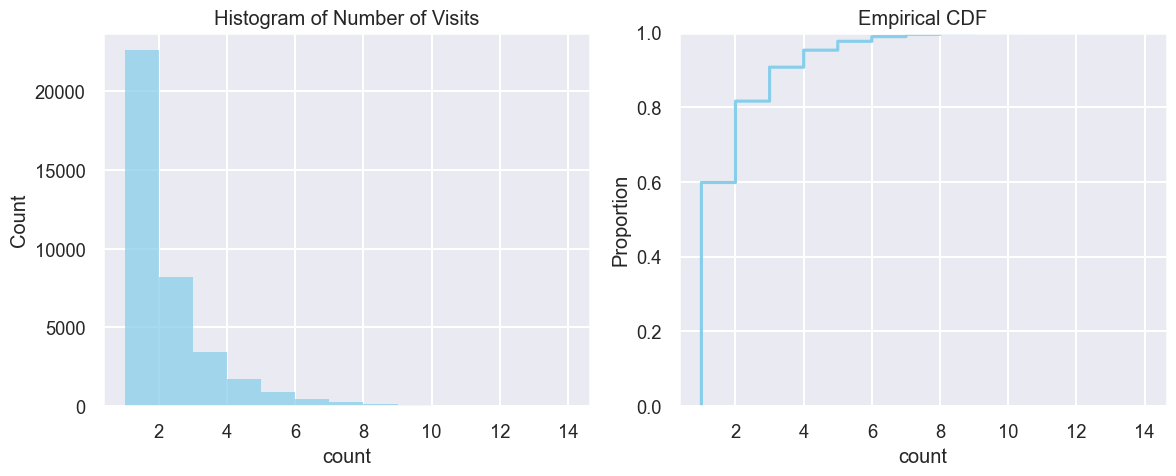

In [98]:
dist_chart_two_panels(num_visits, title1='Histogram of Number of Visits')

**Question 3: What's the distribution of claim payments**

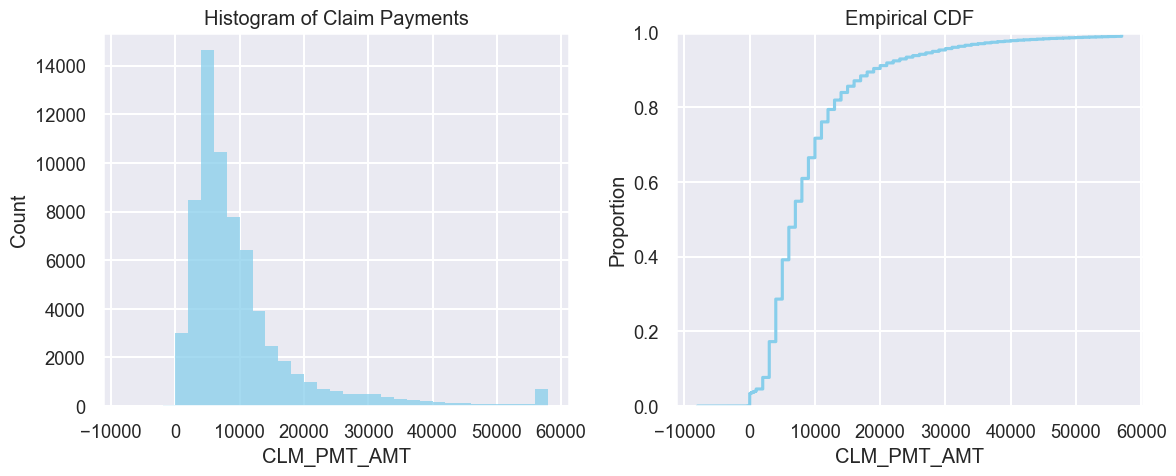

In [99]:
dist_chart_two_panels(df_inpatient['CLM_PMT_AMT'], title1='Histogram of Claim Payments', binwidth=2000)

The claim payments distribution demonstrates a right-skewed shape. The most frequent payment amount is \\$4000-\\$6,000. Around 90% of the claims fall below the \\$20000 mark. 

There are some claims payments being negative. According to the [codebook](https://www.cms.gov/files/document/de-10-codebook.pdf-0)

> In some situations, a negative claim payment amount may be pre-sent; e.g., (1) when a beneficiary is charged the full deductible during a short stay and the deductible exceeded the amount Medicare pays; or (2) when a beneficiary is charged a coinsurance amount during a long stay and the coinsurance amount exceeds the amount Medicare pays (most prevalent situation involves psych hospitals who are paid a daily per diem rate no matter what the charges are.) 